<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследуем-баланс-классов" data-toc-modified-id="Исследуем-баланс-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследуем баланс классов</a></span></li><li><span><a href="#Изучем-модели-без-учёта-дисбаланса" data-toc-modified-id="Изучем-модели-без-учёта-дисбаланса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучем модели без учёта дисбаланса</a></span></li><li><span><a href="#Вывод-по-результатам-исследования" data-toc-modified-id="Вывод-по-результатам-исследования-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод по результатам исследования</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки." data-toc-modified-id="Уменьшение-выборки.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки.</a></span></li><li><span><a href="#Выводы-по-результатам-исследования" data-toc-modified-id="Выводы-по-результатам-исследования-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выводы по результатам исследования</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Мне предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Необходимо построить модель с предельно большим значением *F1*-меры и довести метрику до 0.59.

Дополнительно измерим *AUC-ROC* и сравним её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

## Подготовка данных

In [2]:
data = pd.read_csv('Churn.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<b> Описание данных </b>

<b> Признаки </b>

* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

<b> Целевой признак </b>

* Exited — факт ухода клиента

Столбцы RowNumber (индекс строки в данных), CustomerId (уникальный идентификатор клиента) и Surname (фамилия) не представляют ценности для обучения модели. Поэтому данные столбцы можно удалить.

In [3]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis= 1, inplace= True)

<b> Приведем название стобцов к нижнему регистру. </b>

In [4]:
data.columns = data.columns.str.lower()
data.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited'],
      dtype='object')

<b> Посмотрим на краткую статистическую сводку. </b>

In [5]:
data.describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<b> Проверим столбцы, в которых могут содержаться очевидные ошибки, на аномалии. </b>

In [6]:
data['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
data['age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

In [9]:
data['tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [10]:
data['numofproducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [11]:
data['hascrcard'].unique()

array([1, 0], dtype=int64)

In [12]:
data['isactivemember'].unique()

array([1, 0], dtype=int64)

In [13]:
data['exited'].unique()

array([1, 0], dtype=int64)

<b> Проверим данные на явные дубликаты. </b>

In [14]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено

Посмотрим на количество пропущенных значений в столбце tenure в процентном соотношении.

In [15]:
data['tenure'].isna().sum() / data.shape[0] * 100

9.09

<b> В столбце 9% пропущенных значений. Заполним пропуски медианой. </b>

In [16]:
data['tenure'].fillna(data['tenure'].median(), inplace = True)
data['tenure'].isna().sum()

0

Посмотрев на основную информацию о признаках, можно сделать вывод о том, что One-Hot Encoding применим к столбцам gender и geography, а масштабирование - к creditscore, balance и estimatedSalary, так как мы не хотим, чтобы при обучении какой-то признак с более высоким значением был засчитан как более значимый.

In [17]:
data = pd.get_dummies(data, drop_first = True, columns=['gender', 'geography'])
data.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,gender_Male,geography_Germany,geography_Spain
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1


На данной стадии мы подготовили данные для последующего исследования:
* Изучили данные.
* Удалили 3 столбца, не представляющих ценности для обучения модели.
* Изменили регистр в названии столбцов. 
* Проверили данные на аномалии. 
* Проверили данные на явные дубликаты.
* Заполнили пропуски в столбце tenure медианным значением.
* Применили OHE к двум столбцам.
* Прменили масштабирование к 3 столбцам.

## Исследование задачи

###  Исследуем баланс классов 

0    0.7963
1    0.2037
Name: exited, dtype: float64


<Axes: >

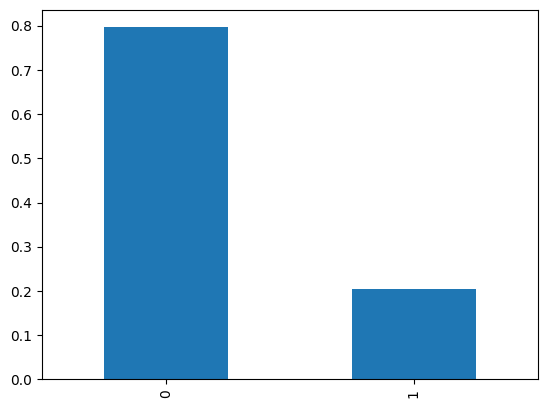

In [18]:
class_balance = data['exited'].value_counts(normalize = True)
print(class_balance)
class_balance.plot(kind='bar')

### Изучем модели без учёта дисбаланса

Разобьем датасет на 3 выборки: train/test/valid (3:1:1)

In [19]:
features = data.drop(['exited'], axis=1)
target = data['exited']

features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.4,
                                                                            random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(features_test,
                                                                            target_test,
                                                                            test_size=0.5,
                                                                            random_state=12345)

<b> Применим масштабирование к creditscore, balance и estimatedsalary. </b>

In [20]:
cols_to_scale = ['creditscore', 'balance', 'estimatedsalary']
scaler = StandardScaler()
scaler.fit(features_train[cols_to_scale])
features_train[cols_to_scale] = scaler.transform(features_train[cols_to_scale])
features_valid[cols_to_scale] = scaler.transform(features_valid[cols_to_scale])
features_train.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,gender_Male,geography_Germany,geography_Spain
7479,-0.886751,35,8.0,1.232271,1,1,0,-0.187705,1,0,1
3411,0.608663,37,8.0,0.600563,1,0,0,-0.333945,0,0,0
6027,2.052152,44,3.0,1.027098,2,0,1,1.503095,1,1,0
1247,-1.457915,24,6.0,-1.233163,2,1,0,-1.071061,1,0,0
3716,0.130961,27,2.0,1.140475,1,0,0,1.524268,0,1,0


Обучим несколько моделей без учёта дисбаланса и посмотрим на ключевые метрики: Recall, Precision и F1-score.

<b> Дерево решений </b>

In [21]:
tree_best_model = None
tree_best_result = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth= depth)
    model.fit(features_train, target_train) 
    predictions_valid = model.predict(features_valid) 
    result = f1_score(target_valid, predictions_valid)
    if result > tree_best_result:
        tree_best_model = model
        tree_best_result = result
        tree_predictions_valid = predictions_valid

print("Accuracy лучшей модели:", accuracy_score(target_valid, tree_predictions_valid))
print("Глубина дерева:", tree_best_model.max_depth)
print("Recall дерева решений:", recall_score(target_valid, tree_predictions_valid))
print("Precision дерева решений:", precision_score(target_valid, tree_predictions_valid))
print("F1 дерева решений:", tree_best_result)
probabilities_one_valid = tree_best_model.predict_proba(features_valid)[:, 1]
tree_best_model_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC-AUC дерева решений:", tree_best_model_roc_auc)

Accuracy лучшей модели: 0.858
Глубина дерева: 6
Recall дерева решений: 0.44976076555023925
Precision дерева решений: 0.7768595041322314
F1 дерева решений: 0.5696969696969697
ROC-AUC дерева решений: 0.8164631712023421


<b> Случайный лес </b>

In [22]:
forest_best_model = None
forest_best_result = 0

for est in range(1, 20):
    for depth in range(1, 20):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth= depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > forest_best_result:
            forest_best_model = model
            forest_best_result = result
            forest_predictions_valid = predictions_valid

print("Accuracy лучшей модели:", accuracy_score(target_valid, forest_predictions_valid))
print("Количество деревьев в лесу:", forest_best_model.n_estimators)
print("Recall случайного леса:", recall_score(target_valid, forest_predictions_valid))
print("Precision случайного леса:", precision_score(target_valid, forest_predictions_valid))
print("F1 случайного леса", forest_best_result)
probabilities_one_valid = forest_best_model.predict_proba(features_valid)[:, 1]
forest_best_model_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC-AUC случайного леса:", forest_best_model_roc_auc)

Accuracy лучшей модели: 0.8675
Количество деревьев в лесу: 18
Recall случайного леса: 0.4880382775119617
Precision случайного леса: 0.8
F1 случайного леса 0.6062407132243686
ROC-AUC случайного леса: 0.8357644916797222


<b> Логистическая регрессия </b>

In [23]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid) 
log_result = f1_score(target_valid, predictions_valid)
print("Accuracy модели:", accuracy_score(target_valid, predictions_valid))
print("Recall логической регрессии:", recall_score(target_valid, predictions_valid))
print("Precision логической регрессии:", precision_score(target_valid, predictions_valid))
print("F1 логической регрессии", log_result)
probabilities_one_valid = model.predict_proba(features_valid)[:, 1]
log_result_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC-AUC случайного леса:", log_result_roc_auc)

Accuracy модели: 0.802
Recall логической регрессии: 0.23444976076555024
Precision логической регрессии: 0.5632183908045977
F1 логической регрессии 0.33108108108108103
ROC-AUC случайного леса: 0.758819312964632


### Вывод по результатам исследования

Среднее гармоническое использованных моделей:
* дерево решений - 0.57;
* случайный лес - 0.6;
* логистическая регрессия - 0.33.

Таким образом, наилучшее значение метрики F1-score без учёта дисбаланса классов демонстрирует модель случайного леса (0.6).

## Борьба с дисбалансом

Для борьбы с дисбалансом применим 3 способа:
1. Взвешивание классов.
2. Увеличение выборки.
3. Уменьшение выборки. 


 ### Взвешивание классов

<b> Дерево решений </b>

In [24]:
weight_tree_best_model = None
weight_tree_best_result = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth= depth, class_weight='balanced')
    model.fit(features_train, target_train) 
    predictions_valid = model.predict(features_valid) 
    result = f1_score(target_valid, predictions_valid)
    if result > weight_tree_best_result:
        weight_tree_best_model = model
        weight_tree_best_result = result
        tree_predictions_valid = predictions_valid

print("Accuracy лучшей модели:", accuracy_score(target_valid, tree_predictions_valid))
print("Глубина дерева:", weight_tree_best_model.max_depth)
print("Recall дерева решений:", recall_score(target_valid, tree_predictions_valid))
print("Precision дерева решений:", precision_score(target_valid, tree_predictions_valid))
print("F1 дерева решений:", weight_tree_best_result)
probabilities_one_valid = weight_tree_best_model.predict_proba(features_valid)[:, 1]
weight_tree_best_model_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC-AUC случайного леса:", weight_tree_best_model_roc_auc)

Accuracy лучшей модели: 0.8105
Глубина дерева: 5
Recall дерева решений: 0.6698564593301436
Precision дерева решений: 0.5374280230326296
F1 дерева решений: 0.5963791267305644
ROC-AUC случайного леса: 0.8310244134068074


<b> Случайный лес </b>

In [25]:
weight_forest_best_model = None
weight_forest_best_result = 0
for est in range(1, 20):
    for depth in range(1, 20):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth= depth, class_weight='balanced')
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > weight_forest_best_result:
            weight_forest_best_model = model
            weight_forest_best_result = result
            forest_predictions_valid = predictions_valid

print("Accuracy лучшей модели:", accuracy_score(target_valid, forest_predictions_valid))
print("Количество деревьев в лесу:", weight_forest_best_model.n_estimators)
print("Глубина дерева:", weight_forest_best_model.max_depth)
print("Recall случайного леса:", recall_score(target_valid, forest_predictions_valid))
print("Precision случайного леса:", precision_score(target_valid, forest_predictions_valid))
print("F1 случайного леса", weight_forest_best_result)
probabilities_one_valid = weight_forest_best_model.predict_proba(features_valid)[:, 1]
weight_forest_best_model_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC-AUC случайного леса:", weight_forest_best_model_roc_auc)

Accuracy лучшей модели: 0.817
Количество деревьев в лесу: 19
Глубина дерева: 6
Recall случайного леса: 0.7344497607655502
Precision случайного леса: 0.5462633451957295
F1 случайного леса 0.6265306122448979
ROC-AUC случайного леса: 0.8463326961813222


<b> Логистическая регрессия </b>

In [26]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000, class_weight='balanced') 
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid) 
weight_log_result = f1_score(target_valid, predictions_valid)
print("Accuracy модели:", accuracy_score(target_valid, predictions_valid))
print("Recall логической регрессии:", recall_score(target_valid, predictions_valid))
print("Precision логической регрессии:", precision_score(target_valid, predictions_valid))
print("F1 логической регрессии", weight_log_result)
probabilities_one_valid = model.predict_proba(features_valid)[:, 1]
weight_log_result_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC-AUC случайного леса:", weight_log_result_roc_auc)

Accuracy модели: 0.702
Recall логической регрессии: 0.6818181818181818
Precision логической регрессии: 0.3810160427807487
F1 логической регрессии 0.4888507718696398
ROC-AUC случайного леса: 0.7636690277584549


### Увеличение выборки


In [27]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

(9588, 11)
(9588,)


<b> Дерево решений </b>

In [28]:
upsample_tree_best_model = None
upsample_tree_best_result = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth= depth)
    model.fit(features_upsampled, target_upsampled) 
    predictions_valid = model.predict(features_valid) 
    result = f1_score(target_valid, predictions_valid)
    if result > upsample_tree_best_result:
        upsample_tree_best_model = model
        upsample_tree_best_result = result
        tree_predictions_valid = predictions_valid

print("Accuracy лучшей модели:", accuracy_score(target_valid, tree_predictions_valid))
print("Глубина дерева:", upsample_tree_best_model.max_depth)
print("Recall дерева решений:", recall_score(target_valid, tree_predictions_valid))
print("Precision дерева решений:", precision_score(target_valid, tree_predictions_valid))
print("F1 дерева решений:", upsample_tree_best_result)
probabilities_one_valid = upsample_tree_best_model.predict_proba(features_valid)[:, 1]
upsample_tree_best_model_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC-AUC случайного леса:", upsample_tree_best_model_roc_auc)

Accuracy лучшей модели: 0.8105
Глубина дерева: 5
Recall дерева решений: 0.6698564593301436
Precision дерева решений: 0.5374280230326296
F1 дерева решений: 0.5963791267305644
ROC-AUC случайного леса: 0.8310244134068074


<b> Случайный лес </b>

In [29]:
upsample_forest_best_model = None
upsample_forest_best_result = 0
for est in range(1, 20):
    for depth in range(1, 20):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth= depth)
        model.fit(features_upsampled, target_upsampled)
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > upsample_forest_best_result:
            upsample_forest_best_model = model
            upsample_forest_best_result = result
            forest_predictions_valid = predictions_valid

print("Accuracy лучшей модели:", accuracy_score(target_valid, forest_predictions_valid))
print("Количество деревьев в лесу:", upsample_forest_best_model.n_estimators)
print("Глубина дерева:", upsample_forest_best_model.max_depth)
print("Recall случайного леса:", recall_score(target_valid, forest_predictions_valid))
print("Precision случайного леса:", precision_score(target_valid, forest_predictions_valid))
print("F1 случайного леса", upsample_forest_best_result)
probabilities_one_valid = upsample_forest_best_model.predict_proba(features_valid)[:, 1]
upsample_forest_best_model_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC-AUC случайного леса:", upsample_forest_best_model_roc_auc)

Accuracy лучшей модели: 0.846
Количество деревьев в лесу: 12
Глубина дерева: 14
Recall случайного леса: 0.6028708133971292
Precision случайного леса: 0.6395939086294417
F1 случайного леса 0.6206896551724138
ROC-AUC случайного леса: 0.8272188919603918


<b> Логистическая регрессия </b>

In [30]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
model.fit(features_upsampled, target_upsampled)
predictions_valid = model.predict(features_valid) 
upsample_log_result = f1_score(target_valid, predictions_valid)
print("Accuracy модели:", accuracy_score(target_valid, predictions_valid))
print("Recall логической регрессии:", recall_score(target_valid, predictions_valid))
print("Precision логической регрессии:", precision_score(target_valid, predictions_valid))
print("F1 логической регрессии", upsample_log_result)
probabilities_one_valid = model.predict_proba(features_valid)[:, 1]
upsample_log_result_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC-AUC случайного леса:", upsample_log_result_roc_auc)

Accuracy модели: 0.7025
Recall логической регрессии: 0.6818181818181818
Precision логической регрессии: 0.3815261044176707
F1 логической регрессии 0.4892703862660944
ROC-AUC случайного леса: 0.7636962478601976


### Уменьшение выборки. 

In [31]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)

(2397, 11)
(2397,)


<b> Дерево решений </b>

In [32]:
downsample_tree_best_model = None
downsample_tree_best_result = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth= depth)
    model.fit(features_downsampled, target_downsampled) 
    predictions_valid = model.predict(features_valid) 
    result = f1_score(target_valid, predictions_valid)
    if result > downsample_tree_best_result:
        downsample_tree_best_model = model
        downsample_tree_best_result = result
        tree_predictions_valid = predictions_valid

print("Accuracy лучшей модели:", accuracy_score(target_valid, tree_predictions_valid))
print("Глубина дерева:", downsample_tree_best_model.max_depth)
print("Recall дерева решений:", recall_score(target_valid, tree_predictions_valid))
print("Precision дерева решений:", precision_score(target_valid, tree_predictions_valid))
print("F1 дерева решений:", downsample_tree_best_result)
probabilities_one_valid = downsample_tree_best_model.predict_proba(features_valid)[:, 1]
downsample_tree_best_model_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC-AUC случайного леса:", downsample_tree_best_model_roc_auc)

Accuracy лучшей модели: 0.8015
Глубина дерева: 5
Recall дерева решений: 0.6985645933014354
Precision дерева решений: 0.5186500888099467
F1 дерева решений: 0.5953109072375127
ROC-AUC случайного леса: 0.8240212861195628


<b> Случайный лес </b>

In [33]:
downsample_forest_best_model = None
downsample_forest_best_result = 0
for est in range(1, 20):
    for depth in range(1, 20):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth= depth)
        model.fit(features_downsampled, target_downsampled)
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > downsample_forest_best_result:
            downsample_forest_best_model = model
            downsample_forest_best_result = result
            forest_predictions_valid = predictions_valid

print("Accuracy лучшей модели:", accuracy_score(target_valid, forest_predictions_valid))
print("Количество деревьев в лесу:", downsample_forest_best_model.n_estimators)
print("Глубина дерева:", downsample_forest_best_model.max_depth)
print("Recall случайного леса:", recall_score(target_valid, forest_predictions_valid))
print("Precision случайного леса:", precision_score(target_valid, forest_predictions_valid))
print("F1 случайного леса", downsample_forest_best_result)
probabilities_one_valid = downsample_forest_best_model.predict_proba(features_valid)[:, 1]
downsample_forest_best_model_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC-AUC случайного леса:", downsample_forest_best_model_roc_auc)

Accuracy лучшей модели: 0.7945
Количество деревьев в лесу: 9
Глубина дерева: 5
Recall случайного леса: 0.7416267942583732
Precision случайного леса: 0.5057096247960848
F1 случайного леса 0.6013579049466536
ROC-AUC случайного леса: 0.8391216375613209


<b> Логистическая регрессия </b>

In [34]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
model.fit(features_downsampled, target_downsampled)
predictions_valid = model.predict(features_valid) 
downsample_log_result = f1_score(target_valid, predictions_valid)
print("Accuracy модели:", accuracy_score(target_valid, predictions_valid))
print("Recall логической регрессии:", recall_score(target_valid, predictions_valid))
print("Precision логической регрессии:", precision_score(target_valid, predictions_valid))
print("F1 логической регрессии", downsample_log_result)
probabilities_one_valid = model.predict_proba(features_valid)[:, 1]
downsample_log_result_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC-AUC случайного леса:",downsample_log_result_roc_auc)

Accuracy модели: 0.7005
Recall логической регрессии: 0.6722488038277512
Precision логической регрессии: 0.3781965006729475
F1 логической регрессии 0.48406546080964685
ROC-AUC случайного леса: 0.7622429968727126


### Выводы по результатам исследования

<b> Метрика F1-score </b>

In [35]:
model_name = ['Дерево решений', 'Случайный лес', 'Логистическая регрессия']
default_values = [tree_best_result, forest_best_result, log_result]
weight_values = [weight_tree_best_result, weight_forest_best_result, weight_log_result]
upsample_values = [upsample_tree_best_result, upsample_forest_best_result, upsample_log_result]
downsample_values = [downsample_tree_best_result, downsample_forest_best_result, downsample_log_result]

data_f1_score = pd.DataFrame({'Модель': model_name,
                           'Без учёта дисбаланса': default_values,
                           'Взвешивание классов': weight_values,
                           'Увеличение выборки': upsample_values,
                           'Уменьшение выборки': downsample_values})

data_f1_score

,Модель,Без учёта дисбаланса,Взвешивание классов,Увеличение выборки,Уменьшение выборки
0,Дерево решений,0.569697,0.596379,0.596379,0.595311
1,Случайный лес,0.606241,0.626531,0.620690,0.601358
2,Логистическая регрессия,0.331081,0.488851,0.489270,0.484065


<b> Метрика AUC-ROC </b> 

In [36]:
model_name = ['Дерево решений', 'Случайный лес', 'Логистическая регрессия']
default_values = [tree_best_model_roc_auc, forest_best_model_roc_auc, log_result_roc_auc]
weight_values = [weight_tree_best_model_roc_auc, weight_forest_best_model_roc_auc, weight_log_result_roc_auc]
upsample_values = [upsample_tree_best_model_roc_auc, upsample_forest_best_model_roc_auc, upsample_log_result_roc_auc]
downsample_values = [downsample_tree_best_model_roc_auc, downsample_forest_best_model_roc_auc, downsample_log_result_roc_auc]

data_roc_auc_score = pd.DataFrame({'Модель': model_name,
                           'Без учёта дисбаланса': default_values,
                           'Взвешивание классов': weight_values,
                           'Увеличение выборки': upsample_values,
                           'Уменьшение выборки': downsample_values})

data_roc_auc_score

,Модель,Без учёта дисбаланса,Взвешивание классов,Увеличение выборки,Уменьшение выборки
0,Дерево решений,0.816463,0.831024,0.831024,0.824021
1,Случайный лес,0.835764,0.846333,0.827219,0.839122
2,Логистическая регрессия,0.758819,0.763669,0.763696,0.762243


Наибольшее значение метрики F1-score (0.627692) и AUC-ROC (0.846933) получено на модели случайного леса при помощи взвешивания классов, поэтому для тестирования будем использовать именно эту модель. Метрика AUC-ROC стабильно высокая у всех моделей и лишь ненамного возрастает при борьбе с дисбалансом.

## Тестирование модели

Для повышения качества объединим валидационную и тестовую сборки.

In [37]:
new_features_test = pd.concat([features_test, features_valid], axis=0, ignore_index=True)
new_target_test = pd.concat([target_test, target_valid], axis=0, ignore_index=True)

In [38]:
predictions_test = weight_forest_best_model.predict(new_features_test) 
print("Accuracy:", accuracy_score(new_target_test, predictions_test))
print("Recall дерева решений:", recall_score(new_target_test, predictions_test))
print("Precision дерева решений:", precision_score(new_target_test, predictions_test))
print("F1 дерева решений:", f1_score(new_target_test, predictions_test))

Accuracy: 0.80125
Recall дерева решений: 0.6920332936979786
Precision дерева решений: 0.5205724508050089
F1 дерева решений: 0.5941807044410412


0.5668409041377729


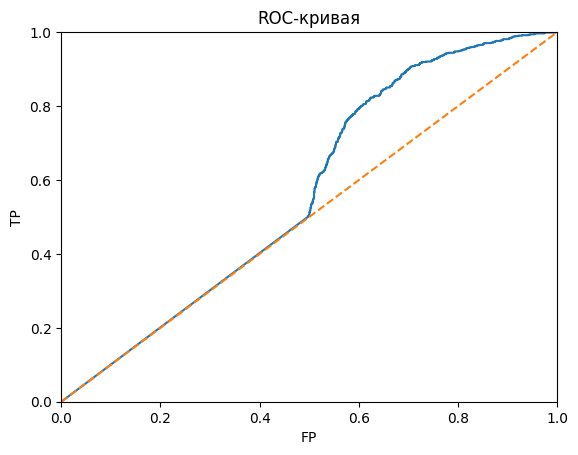

In [39]:
probabilities_test = model.predict_proba(new_features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(new_target_test, probabilities_one_test)
probabilities_test = model.predict_proba(new_features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(new_target_test, probabilities_one_test)
print(auc_roc)
plt.figure()
plt.plot(fpr, tpr, linestyle='solid')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('ROC-кривая')
plt.show()

## Вывод:

Перед исследованием была произведена предварительная подготовка данных:
* Изучили данные.
* Удалили 3 столбца, не представляющих ценности для обучения модели.
* Изменили регистр в названии столбцов. 
* Проверили данные на аномалии. 
* Проверили данные на явные дубликаты.
* Заполнили пропуски в столбце tenure медианным значением.
* Применили OHE к двум столбцам.
* Прменили масштабирование к 3 столбцам.

Проверка датасета на наличие дисбаланса показала, что в целевом признаке наблюдается достаточно сильный дисбаланс классов, лишь 20% отражают факт ухода клиента.

Для борьбы с дисбалансом классов было применено 3 метода:
1. Взвешивание классов.
2. Увеличение выборки.
3. Уменьшение выборки.

Были получены следующие значения метрики F1-score:

In [40]:
data_f1_score

,Модель,Без учёта дисбаланса,Взвешивание классов,Увеличение выборки,Уменьшение выборки
0,Дерево решений,0.569697,0.596379,0.596379,0.595311
1,Случайный лес,0.606241,0.626531,0.620690,0.601358
2,Логистическая регрессия,0.331081,0.488851,0.489270,0.484065


Наибольшее значение метрики F1-score получено на модели случайный лес с использованием взвешивания классов. Далее, наилучшая модель была протестирована на тестовой выборке.
Значения ключевых метрик получились следующие:
* F1-score = 0.61
* AUC-ROC = 0.83